<a href="https://colab.research.google.com/github/deshaami/Fashion-MNIST-Classification-Using-CNN/blob/main/Fashion_MNIST_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

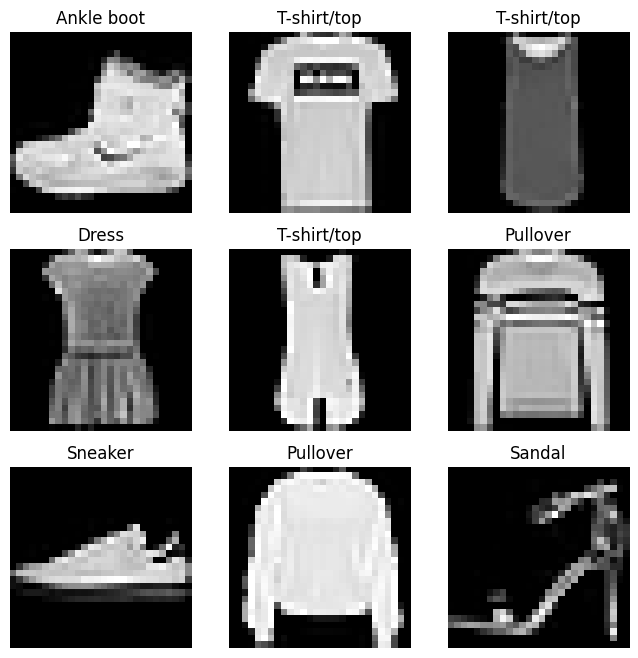

In [ ]:
#dataset

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

var = train_images.shape
print(var)

def display_sample_images(images, labels, class_names, num_rows=3, num_cols=3):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))
    axes = axes.flatten()
    for i in range(num_rows * num_cols):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(class_names[labels[i]])
        axes[i].axis('off')
    plt.show()


display_sample_images(train_images, train_labels, class_names)


In [ ]:
#cnn

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])






model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7908 - loss: 0.5919 - val_accuracy: 0.8179 - val_loss: 0.4778
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8846 - loss: 0.3184 - val_accuracy: 0.8868 - val_loss: 0.2986
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8996 - loss: 0.2744 - val_accuracy: 0.8753 - val_loss: 0.3637
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9095 - loss: 0.2463 - val_accuracy: 0.8896 - val_loss: 0.3073
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9192 - loss: 0.2266 - val_accuracy: 0.8975 - val_loss: 0.2848
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9240 - loss: 0.2042 - val_accuracy: 0.9141 - val_loss: 0.2413
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9329 - loss: 0.1797 - val_accuracy: 0.9088 - val_loss: 0.2743
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9367 - loss: 0.168

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 11, 11, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,317,664 (5.03 MB)

 Trainable params: 438,922 (1.67 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 877,846 (3.35 MB)

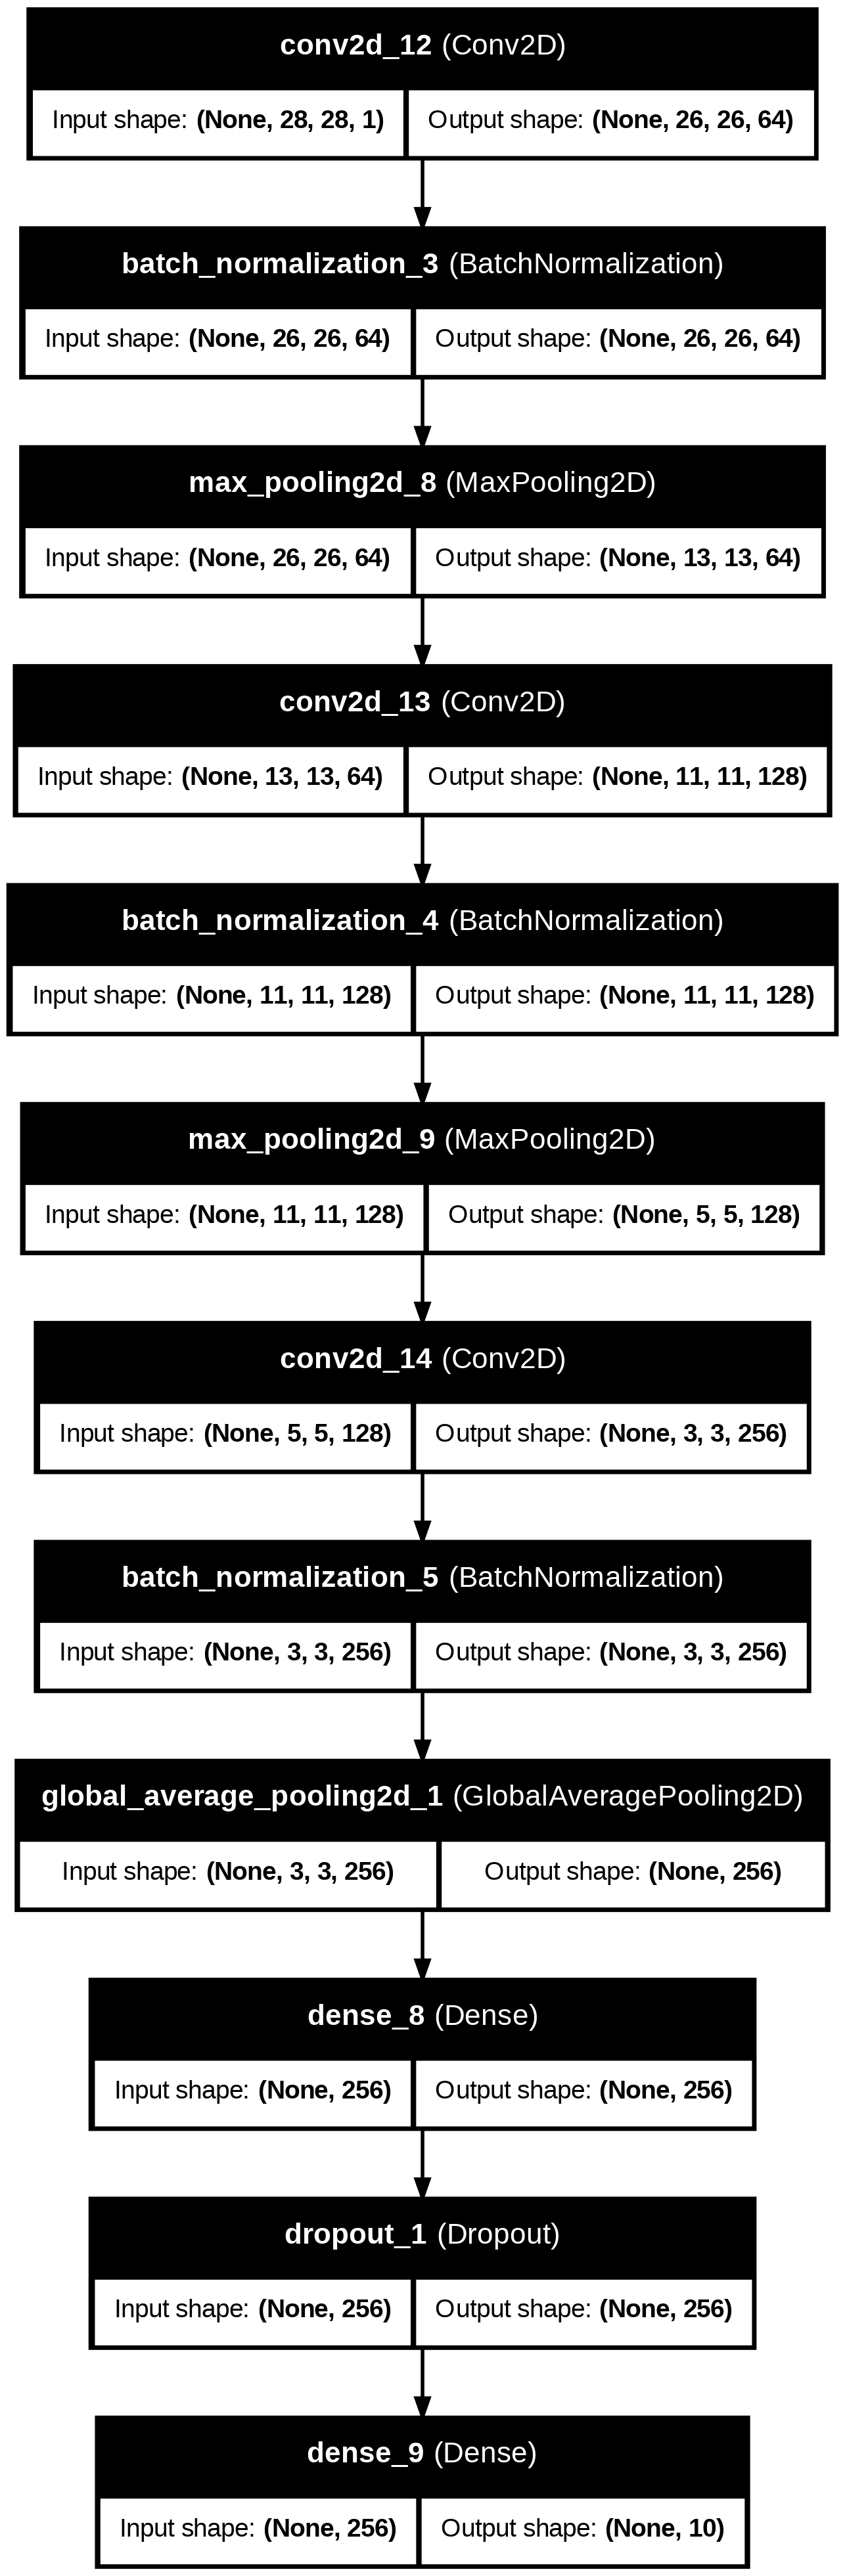

In [ ]:
#model visualization
from tensorflow.keras.utils import plot_model
model.summary()
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9173 - loss: 0.2807
Test accuracy: 0.9184
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


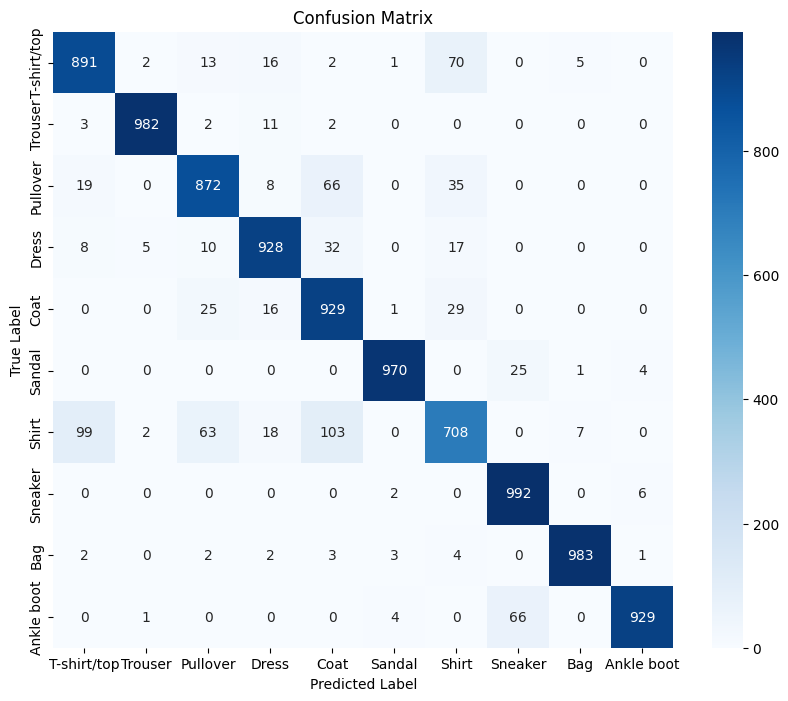


Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.87      0.89      0.88      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.87      0.88      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.82      0.93      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.82      0.71      0.76      1000
     Sneaker       0.92      0.99      0.95      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.99      0.93      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
#result analysis
import matplotlib.pyplot as plt

import seaborn as sns
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report


test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')


y_pred = np.argmax(model.predict(test_images), axis=1)


conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:\n", classification_report(test_labels, y_pred, target_names=class_names))


In [ ]:
var = train_images.shape
print(var)

(60000, 28, 28, 1)


In [ ]:
var = test_images.shape
print(var)

(10000, 28, 28, 1)


In [ ]:
type = train_images.dtype
print(type)

float64


In [ ]:
print(type(train_images))

TypeError: 'numpy.dtypes.Float64DType' object is not callable

In [ ]:
import numpy as np
input_data = np.random.rand(32, 224, 224, 3)  # 32 images of 224x224 RGB
(type(input_data))  # <class 'numpy.ndarray'>


TypeError: 'numpy.dtypes.Float64DType' object is not callable

In [ ]:
import numpy as np
input_data = np.random.rand(32, 224, 224, 3)  # 32 images of 224x224 RGB
print(type(input_data))  # <class 'numpy.ndarray'>

TypeError: 'numpy.dtypes.Float64DType' object is not callable

In [ ]:
import numpy as np
input_data = np.random.rand(32, 224, 224, 3)  # 32 images of 224x224 RGB
print(type(input_data))  # <class 'numpy.ndarray'>
# The error was caused because the built-in function "type" was overwritten.
# Avoid using "type" as a variable name. Renamed it to "data_type"
data_type = train_images.dtype
print(data_type)

TypeError: 'numpy.dtypes.Float64DType' object is not callable

In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Print the type of train_images
print(type(train_images))

TypeError: 'numpy.dtypes.Float64DType' object is not callable